# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Learning Objective

The objective of this experiment is to understand Decision tree classifier and overfitting

## Dataset

Three handmade datasets (A,B,C) are chosen for this experiment

### Setup Steps

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_DT_Overfitting" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/A.csv.zip")
    ipython.magic("sx unzip A.csv.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/B.csv.zip")
    ipython.magic("sx unzip B.csv.zip")
    ipython.magic("sx apt-get install graphviz")
    ipython.magic("sx pip install graphviz")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/C.csv.zip")
    ipython.magic("sx unzip C.csv.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Importing the required packages

In [5]:
import os
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

### **Considering C as train data and B as test data**

In [6]:
C_train = pd.read_csv("C.csv")
C_train.head()

,X,Y,Label
0,4.82,8.14,0
1,5.02,3.84,1
2,4.69,9.63,0
3,8.44,3.22,1
4,1.41,5.44,0


In [7]:
B_test =pd.read_csv("B.csv", names=['X','Y','Label'])
B_test.head()

,X,Y,Label
0,5.46,9.92,0
1,6.22,4.87,1
2,4.98,8.42,0
3,6.35,6.54,1
4,2.54,7.45,0


### Visualize the data to get more sense of data


Matplotlib has a number of built-in colormaps where cmap can be used if c is an array of floats, For more details refer to the following [link](https://matplotlib.org/tutorials/colors/colormaps.html)


In [8]:
# This function can be called for plotting different dataset in this experiment
def getTrainTestPlot(Training_data, Testing_data):
    plt.scatter(Training_data.X, Training_data.Y, c=Training_data.Label, cmap=plt.cm.RdYlBu, s=100, label="Train")
    plt.scatter(Testing_data.X, Testing_data.Y, c=Testing_data.Label, cmap=plt.cm.RdYlBu, marker="*", s=100, label="Test")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()
    return None

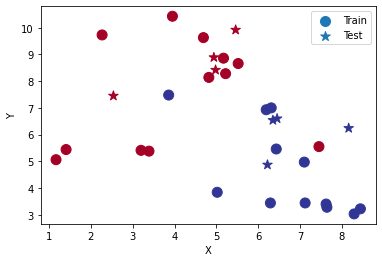

In [9]:
getTrainTestPlot(C_train, B_test)

In [10]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

# MAX- Depth Value
Depth = 7

Get minimum and maximum values of training data. Within the range of training data (x_min, x_max, y_min, y_max), generate a  meshgrid of points  with a plot_step of 0.02 to represent the region in the plot


For more details about np.meshgrid refer the following [link](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

In [11]:
# This function can be called for generating the meshgrid for different datasets in this experiment
def generate_Meshgrid(Training_data, Testing_data):
    x_min, x_max = Training_data.X.min() - 1, Training_data.X.max() + 1
    y_min, y_max = Training_data.Y.min() - 1, Training_data.Y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    XTrain, XTest = Training_data[['X','Y']].values, Testing_data[['X','Y']].values
    yTrain, yTest = Training_data['Label'].values, Testing_data['Label'].values
    return xx, yy, XTrain, yTrain, XTest, yTest

In [12]:
# Generating the meshgrid
xx, yy, C_features, C_labels, B_features, B_labels = generate_Meshgrid(C_train, B_test)

### Plot the graph for the decision tree classifier with depth

Below Helper Functions code block helps in

* Performing decision Tree Classifier in the iterations with depth
* Predicting the above generated meshgrid points and displaying in the plot with countourf (Color filled area)

  - Use two features (xx and yy) as x and y axis to plot to plot decision boundary
  -  Combine both the features (xx and yy) to plot the training data
* Generating a DOT file using graphviz to display and save the decision graph in .png file

In [13]:
#@title Helper Functions

# Below is the function which generates a DOT file using graphviz and save the decision graph in .png file
def getDTViz(**kwargs):
    saveAs = "random_dt" + str(kwargs['Maxdepth']) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(kwargs['classifier'], out_file = save_dot, filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    return save_png

def plotDTwithDepth(xx, yy, XTrain, yTrain, XTest, yTest):
    for depth in range(1,Depth):
        fig,ax =  plt.subplots(1,2,figsize=(14,4))
        ax[0].grid(False)
        # Train
        clf = DecisionTreeClassifier(max_depth = depth,criterion='entropy').fit(XTrain, yTrain)
        print("Training Accuracy: "+str(round(accuracy_score(clf.predict(XTrain),yTrain),2)) + " " + 
              "Testing Accuracy: " + str(round(accuracy_score(clf.predict(XTest),yTest),2)) + " " + 
              "At Depth: " + str(depth))
            
        # Plot the decision boundary
        Z = clf.predict(np.c_[xx.reshape(-1,1), yy.reshape(-1,1)]) # np.c_ is to concatenate the two arrays
        Z = Z.reshape(xx.shape)
        cs = ax[0].contourf(xx, yy, Z, cmap=plt.cm.Greens)
        ax[0].set_title("Depth is" + " " + str(depth))
        
        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(yTrain == i)
            ax[0].scatter(XTrain[idx, 0], XTrain[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
            ax[0].grid(False)
        
        #  Call the getDTViz function for saving the decision graph in .png file and plot the same
        save_png = getDTViz(Maxdepth = depth, classifier = clf)
        ax[0].grid(False)
        ax[1].imshow(plt.imread(save_png))
        plt.show()
    return None

Training Accuracy: 0.88 Testing Accuracy: 1.0 At Depth: 1


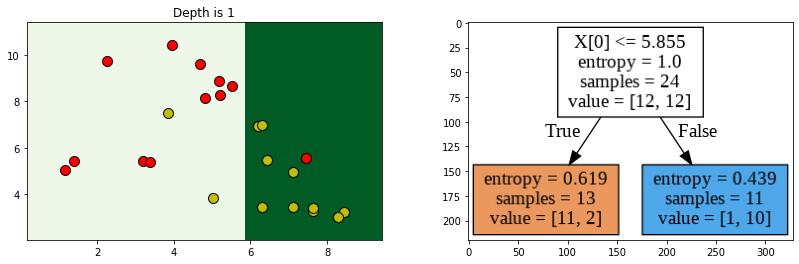

Training Accuracy: 0.92 Testing Accuracy: 1.0 At Depth: 2


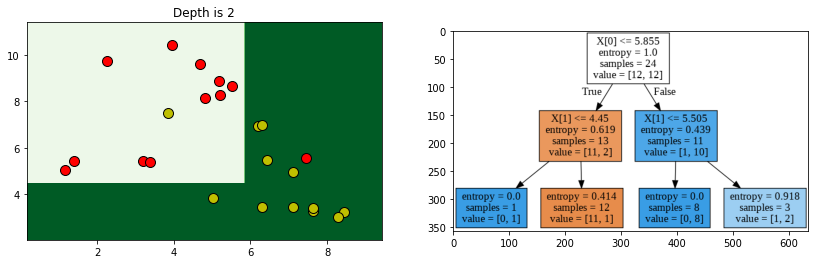

Training Accuracy: 0.96 Testing Accuracy: 0.88 At Depth: 3


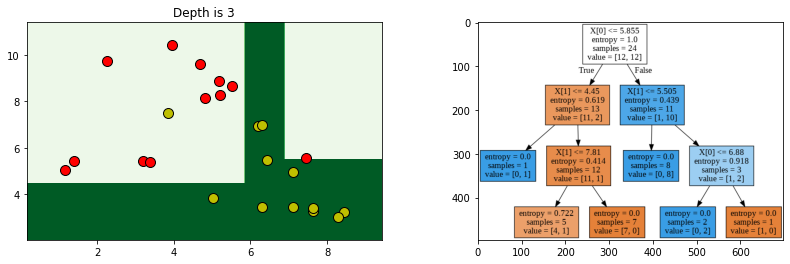

Training Accuracy: 1.0 Testing Accuracy: 0.88 At Depth: 4


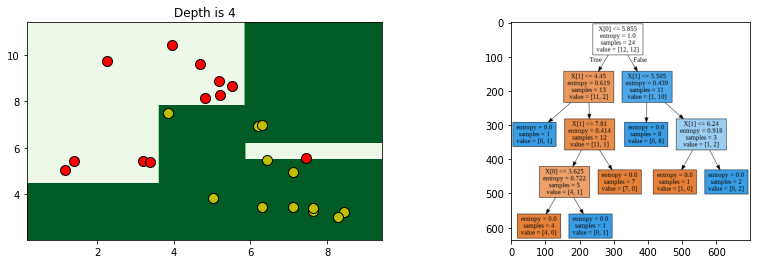

Training Accuracy: 1.0 Testing Accuracy: 0.75 At Depth: 5


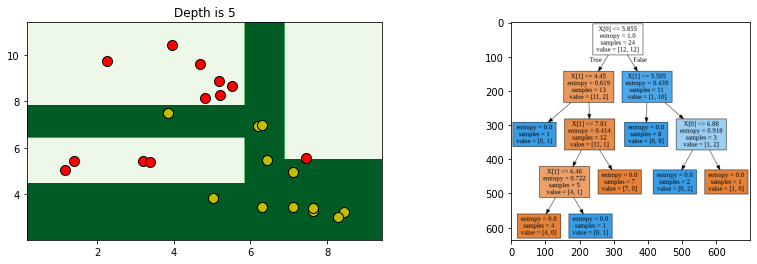

Training Accuracy: 1.0 Testing Accuracy: 0.88 At Depth: 6


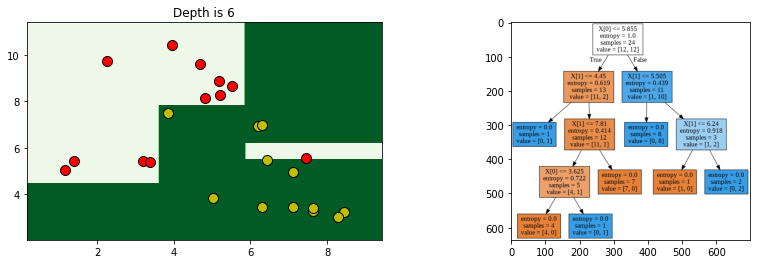

In [14]:
plotDTwithDepth(xx, yy, C_features, C_labels, B_features, B_labels)

### **Considering A as train data and B as test data**

In [15]:
A_train = pd.read_csv("A.csv")
A_train.head()

,X,Y,Label
0,4.82,8.14,0
1,5.02,3.84,1
2,4.69,9.63,0
3,8.44,3.22,1
4,1.41,5.44,0


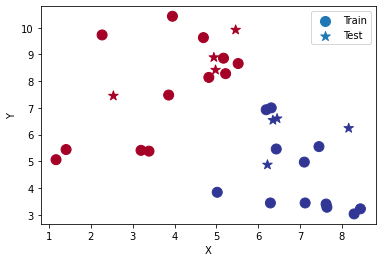

In [16]:
getTrainTestPlot(A_train, B_test)
xx1, yy1, A_features, A_labels, B_features, B_labels = generate_Meshgrid(A_train, B_test)

Training Accuracy: 0.96 Testing Accuracy: 1.0 At Depth: 1


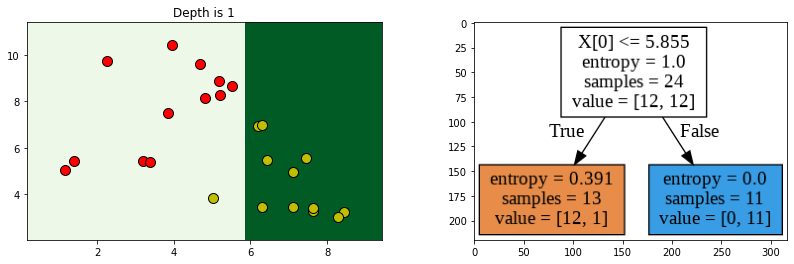

Training Accuracy: 1.0 Testing Accuracy: 1.0 At Depth: 2


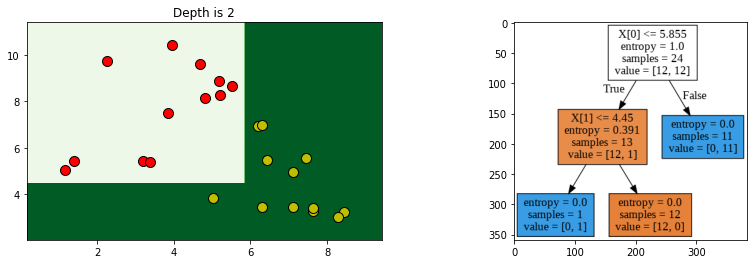

Training Accuracy: 1.0 Testing Accuracy: 1.0 At Depth: 3


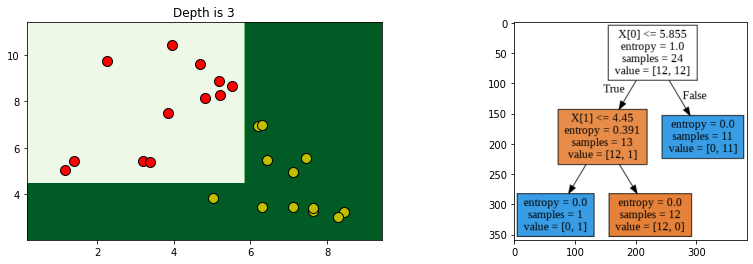

Training Accuracy: 1.0 Testing Accuracy: 1.0 At Depth: 4


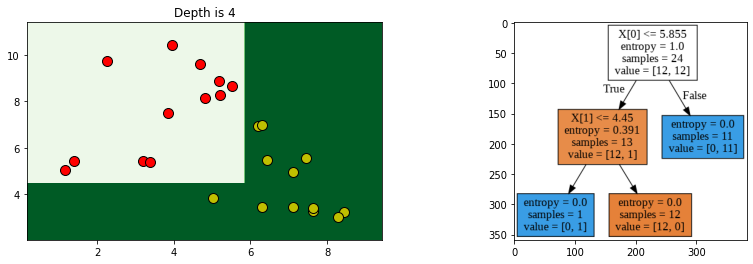

Training Accuracy: 1.0 Testing Accuracy: 1.0 At Depth: 5


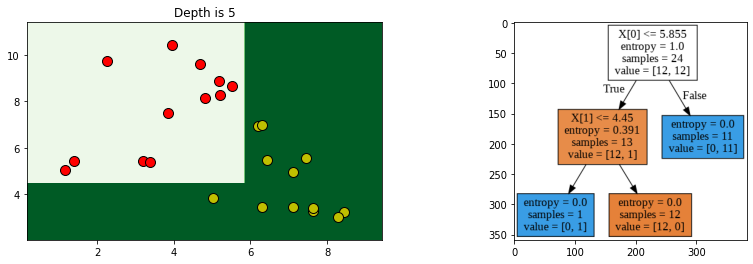

Training Accuracy: 1.0 Testing Accuracy: 1.0 At Depth: 6


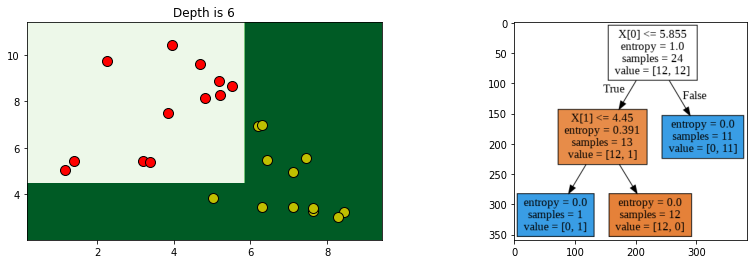

In [17]:
plotDTwithDepth(xx1, yy1, A_features, A_labels, B_features, B_labels)

## Please answer the questions below to complete the experiment:

In [18]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [19]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Interesting topic." #@param {type:"string"}


In [20]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [21]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [22]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2736
Date of submission:  12 Sep 2020
Time of submission:  12:09:07
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
